In [1]:
def wang_et_al(ppr, Tpr):
    coefficients = {
        "A1": 256.41675, "A2": 7.18202, "A3": -178.57250, "A4": 182.98704,
        "A5": -40.74427, "A6": 2.24427, "A7": 47.44825, "A8": 5.28520,
        "A9": -0.14914, "A10": 271.50446, "A11": 16.26940, "A12": -121.51728,
        "A13": 167.71477, "A14": -81.73093, "A15": 20.36191, "A16": -2.11770,
        "A17": 124.64444, "A18": -6.74331, "A19": 0.20897, "A20": -0.00314
    }

    Z = (
        coefficients["A1"] +
        coefficients["A2"] * (1 + coefficients["A3"] * Tpr + coefficients["A4"] * Tpr ** 2 + coefficients["A5"] * Tpr ** 3 + coefficients["A6"] * Tpr ** 4) * ppr +
        coefficients["A7"] * ppr ** 2 + coefficients["A8"] * ppr ** 3 + coefficients["A9"] * ppr ** 4
    ) / (
        coefficients["A10"] +
        coefficients["A11"] * (1 + coefficients["A12"] * Tpr + coefficients["A13"] * Tpr ** 2 + coefficients["A14"] * Tpr ** 3 + coefficients["A15"] * Tpr ** 4 + coefficients["A16"] * Tpr ** 5) * ppr +
        coefficients["A17"] * ppr ** 2 + coefficients["A18"] * ppr ** 3 + coefficients["A19"] * ppr ** 4 + coefficients["A20"] * ppr ** 5
    )
    
    return Z

In [2]:
import math

def Heidaryan_et_al(ppr, Tpr):
    # Tuned coefficients
    tuned_coefficients = {
        "A1": 1.11532372699824, "A2": -0.07903952088760, "A3": 0.01588138045027,
        "A4": 0.00886134496010, "A5": -2.16190792611599, "A6": 1.15753118672070,
        "A7": -0.05367780720737, "A8": 0.01465569989618, "A9": -1.80997374923296,
        "A10": 0.95486038773032
    }

    ln_ppr = math.log(ppr)
    ln_ppr_squared = ln_ppr ** 2
    ln_ppr_cubed = ln_ppr ** 3

    numerator = (tuned_coefficients["A1"] +
                 tuned_coefficients["A2"] * ln_ppr +
                 tuned_coefficients["A3"] * ln_ppr_squared +
                 tuned_coefficients["A4"] * ln_ppr_cubed +
                 tuned_coefficients["A5"] / Tpr +
                 tuned_coefficients["A6"] / (Tpr ** 2))

    denominator = (1 +
                   tuned_coefficients["A7"] * ln_ppr +
                   tuned_coefficients["A8"] * ln_ppr_squared +
                   tuned_coefficients["A9"] / Tpr +
                   tuned_coefficients["A10"] / (Tpr ** 2))

    Z = numerator / denominator

    return Z


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("df_for_models.csv")

# # Filter rows where 'Corrected Tpr' values are within the range of 1 to 3
filtered_df = df[(df['Corrected Tpr'] >= 1) & (df['Corrected Tpr'] <= 3)]

# Calculate Z values using wang_et_al function and create a new column 
filtered_df['wang_pseudo'] = filtered_df.apply(lambda row: wang_et_al(row['Pseudoreduced Pressure'], row['Pseudoreduced Temperature']), axis=1)
filtered_df['Heidaryan_pseudo'] = filtered_df.apply(lambda row: Heidaryan_et_al(row['Pseudoreduced Pressure'], row['Pseudoreduced Temperature']), axis=1)

# Calculate Z values using wang_et_al function and create a new column 
filtered_df['wang_corrected'] = filtered_df.apply(lambda row: wang_et_al(row['Corrected Ppr'], row['Corrected Tpr']), axis=1)
filtered_df['Heidaryan_corrected'] = filtered_df.apply(lambda row: Heidaryan_et_al(row['Corrected Ppr'], row['Corrected Tpr']), axis=1)

# Display the updated DataFrame with the new 'wang' column containing Z values
df_with_z_factors = filtered_df.copy()

C:\Users\okola\AppData\Local\Temp\ipykernel_30228\2904059259.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wang_pseudo'] = filtered_df.apply(lambda row: wang_et_al(row['Pseudoreduced Pressure'], row['Pseudoreduced Temperature']), axis=1)
C:\Users\okola\AppData\Local\Temp\ipykernel_30228\2904059259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Heidaryan_pseudo'] = filtered_df.apply(lambda row: Heidaryan_et_al(row['Pseudoreduced Pressure'], row['Pseudoreduced Temperatur

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(df_with_z_factors['z'], df_with_z_factors['wang_pseudo'])

# Calculating MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((df_with_z_factors['z'] - df_with_z_factors['wang_pseudo']) / df_with_z_factors['z'])) * 100

# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(df_with_z_factors['z'], df_with_z_factors['wang_pseudo']))

# Calculating R2 Score
r2 = r2_score(df_with_z_factors['z'], df_with_z_factors['wang_pseudo'])

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")


MAE: 0.025269474290919598
MAPE: 3.3120777138982787
RMSE: 0.029178769875953612
R-squared (R2): 0.9426626561851833


In [5]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming df_with_z_factors is your DataFrame
# Sample 20% of the data
sampled_data = df_with_z_factors.sample(frac=0.2, random_state=42)

# Calculating the metrics
mae = mean_absolute_error(sampled_data['z'], sampled_data['wang_pseudo'])
mape = np.mean(np.abs((sampled_data['z'] - sampled_data['wang_pseudo']) / sampled_data['z'])) * 100
rmse = np.sqrt(mean_squared_error(sampled_data['z'], sampled_data['wang_pseudo']))
r2 = r2_score(sampled_data['z'], sampled_data['wang_pseudo'])

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")

# Creating a DataFrame for predicted vs actual values
predicted_vs_actual = pd.DataFrame({
    'Actual z': sampled_data['z'],
    'Predicted z': sampled_data['wang_pseudo']
})

# Export to Excel
predicted_vs_actual.to_excel("Wang Pseudo data result.xlsx", index=False)


MAE: 0.024064246456899963
MAPE: 3.1697070497910844
RMSE: 0.028439336794475176
R-squared (R2): 0.9502443127676661


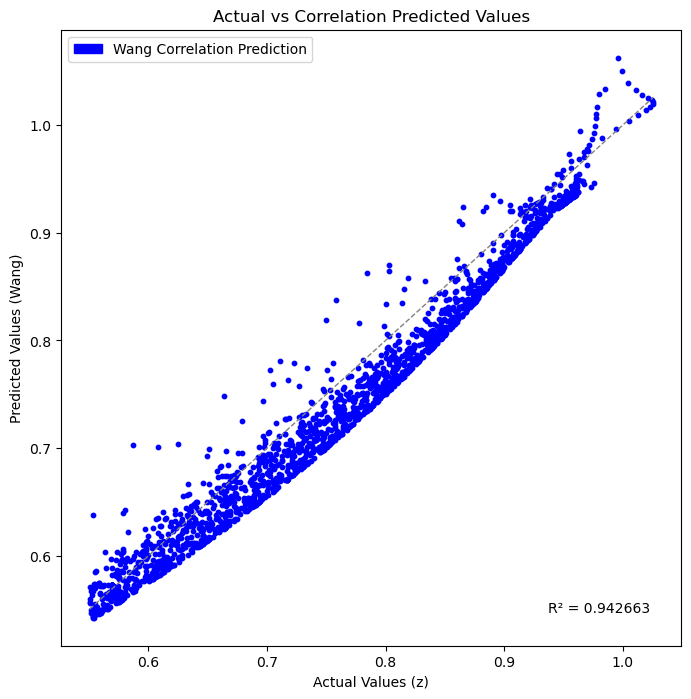

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import r2_score
import numpy as np

# Extract actual and predicted values from the DataFrame
actual_values = df_with_z_factors['z']
predicted_values = df_with_z_factors['wang_corrected']

# Calculate R-squared value
r2 = r2_score(actual_values, predicted_values)


# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for all values
ax.scatter(actual_values, predicted_values, marker=".", s=40, label='Correlation Prediction', color='blue')

# Plot line of equality with grey color and dashed style
ax.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='grey', linestyle='--', lw=1, label='Line of Equality')

# Annotation for R-squared value on the plot at the bottom right
ax.text(0.95, 0.05, f'R\u00b2 = {r2:.6f}', transform=ax.transAxes,
        fontsize=10, color='black', ha='right', va='bottom')

# Set plot title and labels
ax.set_title('Actual vs Correlation Predicted Values')
ax.set_xlabel('Actual Values (z)')
ax.set_ylabel('Predicted Values (Wang)')

# Create the legend
legend_elements = [
    mpatches.Patch(color='blue', label='Wang Correlation Prediction'),
]
ax.legend(handles=legend_elements)

# Show the plot
plt.show()


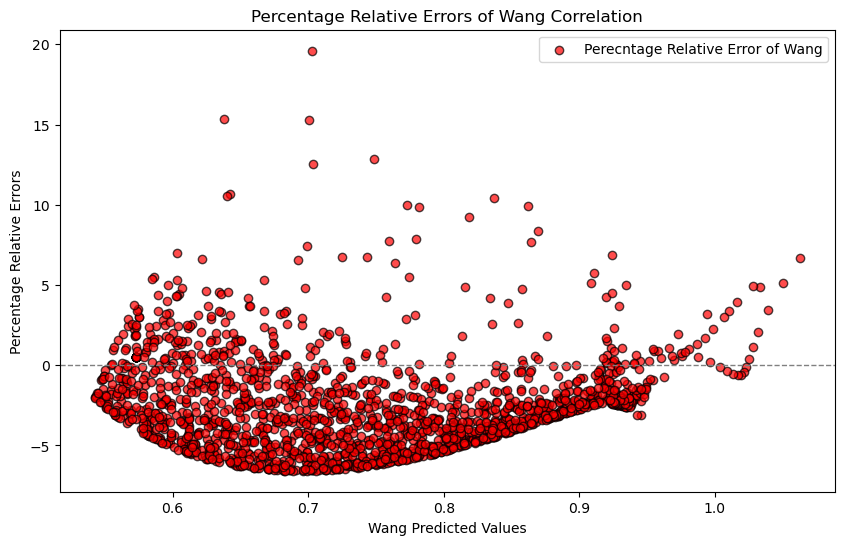

In [7]:

# Calculate Percentage Relative Error for DAK predictions
percentage_relative_error = ((df_with_z_factors['wang_corrected'] - df_with_z_factors['z']) / df_with_z_factors['z']) * 100

# Separate predictions into overprediction and underprediction categories
over_prediction = df_with_z_factors['wang_corrected'][percentage_relative_error > 0]
under_prediction = df_with_z_factors['wang_corrected'][percentage_relative_error <= 0]

# Plotting Percentage Relative Errors
plt.figure(figsize=(10, 6))

# Plotting overpredictions in green and underpredictions in red
plt.scatter(over_prediction, percentage_relative_error[percentage_relative_error > 0], c='red', marker='o', edgecolor='black', alpha=0.7, label='Perecntage Relative Error of Wang')
plt.scatter(under_prediction, percentage_relative_error[percentage_relative_error <= 0], c='red', marker='o', edgecolor='black', alpha=0.7, )

plt.xlabel('Wang Predicted Values')
plt.ylabel('Percentage Relative Errors')
plt.title('Percentage Relative Errors of Wang Correlation')

# Adding a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Show legends
plt.legend()

# Show the plot
plt.show()


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(df_with_z_factors['z'], df_with_z_factors['Heidaryan_pseudo'])

# Calculating MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((df_with_z_factors['z'] - df_with_z_factors['Heidaryan_pseudo']) / df_with_z_factors['z'])) * 100

# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(df_with_z_factors['z'], df_with_z_factors['Heidaryan_pseudo']))

# Calculating R2 Score
r2 = r2_score(df_with_z_factors['z'], df_with_z_factors['Heidaryan_pseudo'])

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")


MAE: 0.03471391273896028
MAPE: 4.735597451985284
RMSE: 0.04362333864327349
R-squared (R2): 0.8718432712052226


In [9]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming df_with_z_factors is your DataFrame
# Sample 20% of the data
sampled_data = df_with_z_factors.sample(frac=0.2, random_state=42)

# Creating a DataFrame for predicted vs actual values
predicted_vs_actual = pd.DataFrame({
    'Actual z': sampled_data['z'],
    'Predicted z': sampled_data['Heidaryan_pseudo']
})

# Export to Excel
predicted_vs_actual.to_excel("Heidaryan pseudo data result.xlsx", index=False)


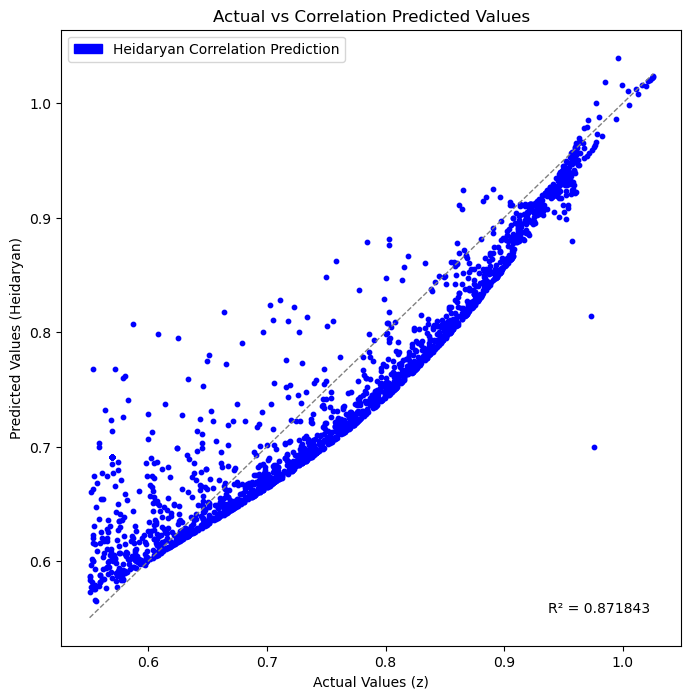

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import r2_score
import numpy as np

# Extract actual and predicted values from the DataFrame
actual_values = df_with_z_factors['z']
predicted_values = df_with_z_factors['Heidaryan_corrected']

# Calculate R-squared value
r2 = r2_score(actual_values, predicted_values)


# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for all values
ax.scatter(actual_values, predicted_values, marker=".", s=40, label='Correlation Prediction', color='blue')

# Plot line of equality with grey color and dashed style
ax.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='grey', linestyle='--', lw=1, label='Line of Equality')

# Annotation for R-squared value on the plot at the bottom right
ax.text(0.95, 0.05, f'R\u00b2 = {r2:.6f}', transform=ax.transAxes,
        fontsize=10, color='black', ha='right', va='bottom')

# Set plot title and labels
ax.set_title('Actual vs Correlation Predicted Values')
ax.set_xlabel('Actual Values (z)')
ax.set_ylabel('Predicted Values (Heidaryan)')

# Create the legend
legend_elements = [
    mpatches.Patch(color='blue', label='Heidaryan Correlation Prediction'),
]
ax.legend(handles=legend_elements)

# Show the plot
plt.show()


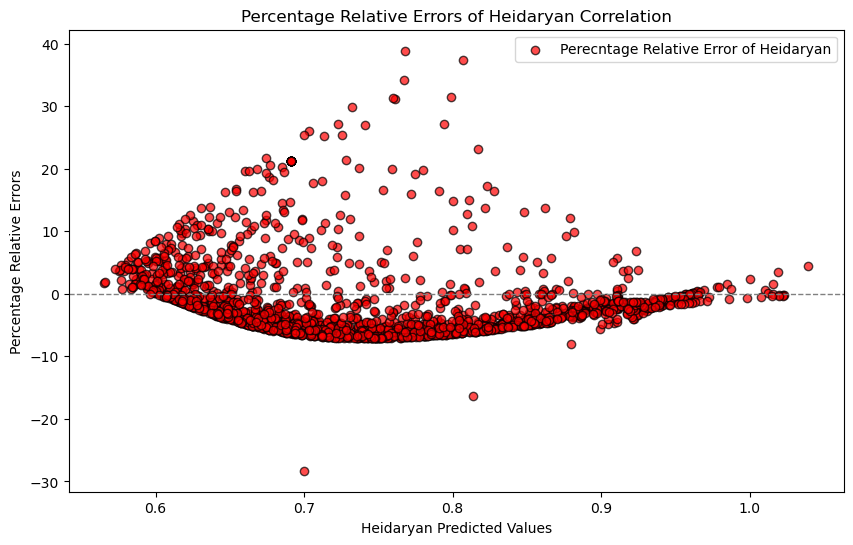

In [12]:

# Calculate Percentage Relative Error for DAK predictions
percentage_relative_error = ((df_with_z_factors['Heidaryan_corrected'] - df_with_z_factors['z']) / df_with_z_factors['z']) * 100

# Separate predictions into overprediction and underprediction categories
over_prediction = df_with_z_factors['Heidaryan_corrected'][percentage_relative_error > 0]
under_prediction = df_with_z_factors['Heidaryan_corrected'][percentage_relative_error <= 0]

# Plotting Percentage Relative Errors
plt.figure(figsize=(10, 6))

# Plotting overpredictions in green and underpredictions in red
plt.scatter(over_prediction, percentage_relative_error[percentage_relative_error > 0], c='red', marker='o', edgecolor='black', alpha=0.7, label='Perecntage Relative Error of Heidaryan')
plt.scatter(under_prediction, percentage_relative_error[percentage_relative_error <= 0], c='red', marker='o', edgecolor='black', alpha=0.7, )

plt.xlabel('Heidaryan Predicted Values')
plt.ylabel('Percentage Relative Errors')
plt.title('Percentage Relative Errors of Heidaryan Correlation')

# Adding a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Show legends
plt.legend()

# Show the plot
plt.show()
